In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_excel('crime_data.xlsx')

In [89]:
df

,ID,Case Number,Date,Block,UCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,NIC Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11614273,JC174951,2017-01-01 00:00:00,018XX S CALIFORNIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,12.0,29,11,NaN,NaN,2017,2019-06-03 16:20:10,NaN,NaN,NaN
1,11622471,JC184902,2017-01-01 00:00:00,013XX S LAWNDALE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,24.0,29,11,NaN,NaN,2017,03/14/2019 04:07:17 PM,NaN,NaN,NaN
2,11255786,JB185271,2017-01-01 00:00:00,045XX N HAZEL ST,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,COMMERCIAL / BUSINESS OFFICE,False,False,...,46.0,3,11,NaN,NaN,2017,03/15/2018 03:55:29 PM,NaN,NaN,NaN
3,11259747,JB190580,2017-01-01 00:00:00,038XX W ARMITAGE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,26.0,22,11,NaN,NaN,2017,03/19/2018 04:13:18 PM,NaN,NaN,NaN
4,11267468,JB195629,2017-01-01 00:00:00,017XX W HENDERSON ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,47.0,6,17,NaN,NaN,2017,08/23/2019 03:57:55 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247792,12781978,JF342485,2022-03-08 09:30:00,055XX S PRINCETON AVE,810,THEFT,OVER $500,STREET,False,False,...,3.0,68,6,NaN,NaN,2022,2023-02-01 15:48:34,NaN,NaN,NaN
247793,12785097,JF346135,2022-06-08 01:33:00,018XX S RACINE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,...,25.0,31,14,NaN,NaN,2022,2023-02-01 15:48:34,NaN,NaN,NaN
247794,12628303,JF156765,2022-07-02 05:13:00,061XX N HAMILTON AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,40.0,2,08A,NaN,NaN,2022,02/27/2022 03:48:47 PM,NaN,NaN,NaN
247795,12786940,JF348190,2022-07-08 03:20:00,011XX W LELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - PORCH / HALLWAY,False,False,...,46.0,3,14,NaN,NaN,2022,2023-02-01 15:48:34,NaN,NaN,NaN


In [90]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'UCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'NIC Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [91]:
df=df.drop(columns={'ID','Case Number','UCR','X Coordinate','Y Coordinate','Updated On','Location'}, axis=1)

In [92]:
df=df.drop(columns={'Latitude','Longitude'}, axis=1)

In [93]:
df.isnull().sum()

Date                      0
Block                     0
Primary Type              0
Description               0
Location Description    879
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      1
Community Area            0
NIC Code                  0
Year                      0
dtype: int64

In [94]:
df.shape

(247797, 13)

In [95]:
df=df.dropna()
df.isnull().sum()

Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
NIC Code                0
Year                    0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246917 entries, 0 to 247796
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  246917 non-null  datetime64[ns]
 1   Block                 246917 non-null  object        
 2   Primary Type          246917 non-null  object        
 3   Description           246917 non-null  object        
 4   Location Description  246917 non-null  object        
 5   Arrest                246917 non-null  bool          
 6   Domestic              246917 non-null  bool          
 7   Beat                  246917 non-null  int64         
 8   District              246917 non-null  int64         
 9   Ward                  246917 non-null  float64       
 10  Community Area        246917 non-null  int64         
 11  NIC Code              246917 non-null  object        
 12  Year                  246917 non-null  int64         
dtyp

In [97]:
df=df.set_index('Date')

In [98]:
df

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,NIC Code,Year
Date,,,,,,,,,,,,
2017-01-01 00:00:00,018XX S CALIFORNIA AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1022,10,12.0,29,11,2017
2017-01-01 00:00:00,013XX S LAWNDALE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1011,10,24.0,29,11,2017
2017-01-01 00:00:00,045XX N HAZEL ST,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,COMMERCIAL / BUSINESS OFFICE,False,False,1914,19,46.0,3,11,2017
2017-01-01 00:00:00,038XX W ARMITAGE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2525,25,26.0,22,11,2017
2017-01-01 00:00:00,017XX W HENDERSON ST,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1922,19,47.0,6,17,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 09:30:00,055XX S PRINCETON AVE,THEFT,OVER $500,STREET,False,False,711,7,3.0,68,6,2022
2022-06-08 01:33:00,018XX S RACINE AVE,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,1233,12,25.0,31,14,2022
2022-07-02 05:13:00,061XX N HAMILTON AVE,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,2413,24,40.0,2,08A,2022


##  years with highest crime records

In [99]:
crime_by_year=df.groupby([df.index.year]).size()

In [100]:
crime_by_year

Date
2017    102208
2018    101532
2019     39100
2020      3605
2021       466
2022         6
dtype: int64

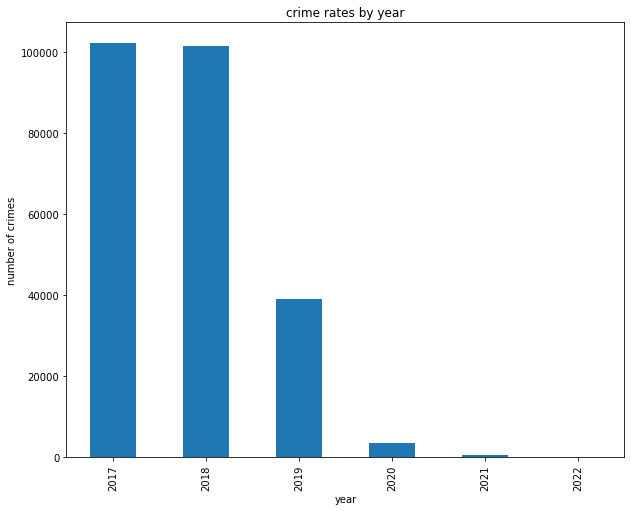

In [101]:
crime_by_year.plot(kind='bar', figsize=(10,8))
plt.title('crime rates by year')
plt.xlabel('year')
plt.ylabel('number of crimes')
plt.show()

## type of crime happening in the country

In [102]:
crime_type_counts=df[['Primary Type','Arrest','Domestic']].groupby('Primary Type').sum()
crime_type_counts['Total']=df.groupby('Primary Type').size()
crime_type_counts=crime_type_counts.sort_values(by='Total')

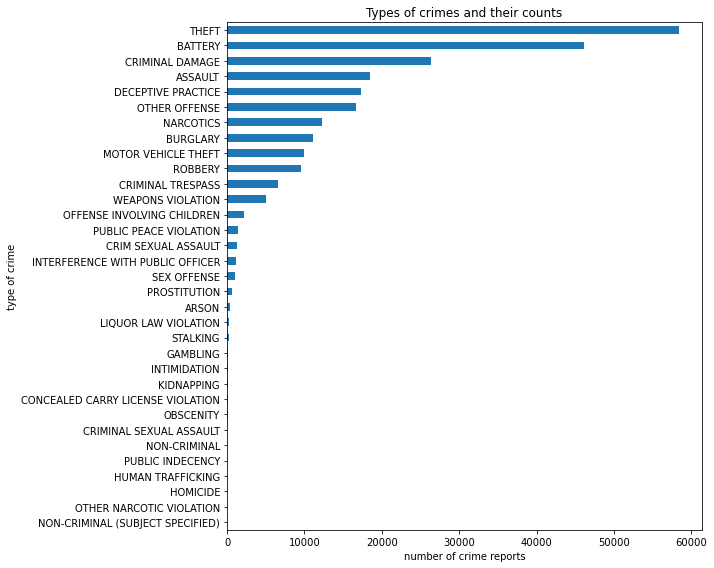

In [103]:
crime_type_counts['Total'].plot(kind='barh', figsize=(10,8))
plt.title('Types of crimes and their counts')
plt.xlabel('number of crime reports')
plt.ylabel('type of crime')
plt.tight_layout()
plt.show()

### we can see that THEFT is the most common type of crime which is committed

## deep into theft crimes

In [104]:
theft_crimes=df[df['Primary Type']=='THEFT']
theft_crimes_details=theft_crimes[['Primary Type','Description']].groupby('Description').count().sort_values(by='Primary Type', ascending=False)

In [105]:
theft_crimes_details

,Primary Type
Description,
$500 AND UNDER,22221
OVER $500,13465
FROM BUILDING,10028
RETAIL THEFT,9425
POCKET-PICKING,2310
PURSE-SNATCHING,565
ATTEMPT THEFT,361
DELIVERY CONTAINER THEFT,43
FROM COIN-OP MACHINE/DEVICE,14


### from above we can see that most of the thefts are under $500 

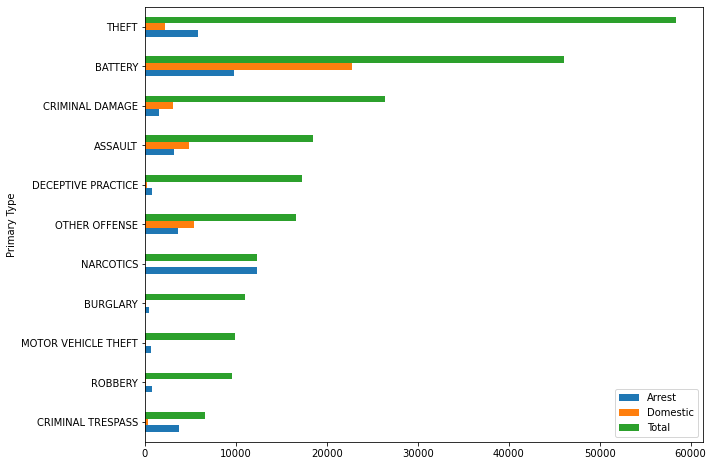

In [106]:
crime_type_counts[crime_type_counts['Total']>=5000].sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(10,8))
plt.show()

## Top 10 locations by no. of crimes

In [107]:
crimes_by_location=df[['Location Description','Arrest','Domestic']].groupby('Location Description').sum()

In [108]:
crimes_by_location['Total']=df.groupby('Location Description').size()

In [109]:
crimes_by_location.sort_values(by='Total', ascending=False)

,Arrest,Domestic,Total
Location Description,,,
STREET,11956,4324,54127
RESIDENCE,4761,14757,42685
APARTMENT,4956,13972,32567
SIDEWALK,7284,2299,18994
OTHER,974,787,10017
...,...,...,...
SCHOOL - PUBLIC GROUNDS,0,0,2
MOVIE HOUSE / THEATER,1,0,1
LAKEFRONT / WATERFRONT / RIVERBANK,0,1,1


### most of the crimes happened on the streets

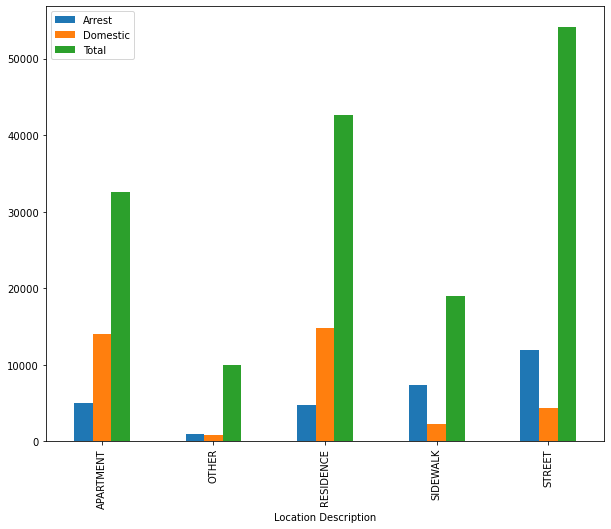

In [110]:
crimes_by_location[crimes_by_location['Total']>10000].plot(kind='bar', figsize=(10,8))
plt.show()

## comparing arrested vs not arrested

In [147]:
df.isnull().sum()

Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
NIC Code                0
Year                    0
dtype: int64

In [120]:
from collections import Counter
Arrest=df['Arrest']
Arrest2=Counter(Arrest)

In [123]:
MOstCommonCA=Arrest2.most_common()
MOstCommonCA

[(False, 196666), (True, 50251)]

In [124]:
x,y = zip(*MOstCommonCA)
x,y = list(x),list(y)
x,y

([False, True], [196666, 50251])

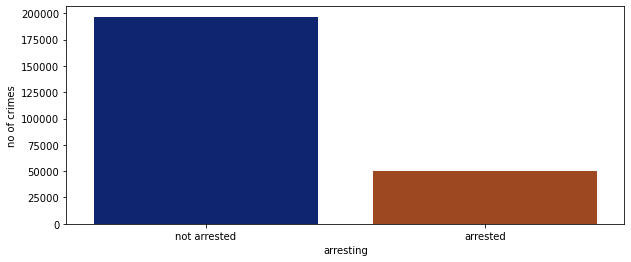

In [177]:
x[1]="arrested"
x[0]="not arrested"
plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette='dark')
plt.xlabel('arresting')
plt.ylabel('no of crimes')
plt.show()

### from above plot we can see that maximum no of crimes are not being arrested

## plot rate of arrested vs not arrested

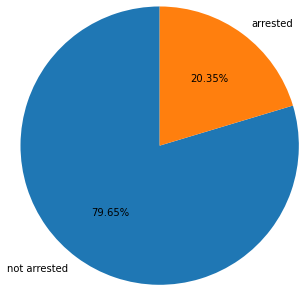

In [187]:
plt.pie(y,labels=x, autopct="%0.2f%%",startangle=90,radius=1.6)
plt.show()

### about 80% commotted crimes were left unarrested

## arrested rate per crime

In [200]:
rate_per_crime=df.groupby('Primary Type')['Arrest'].mean().reset_index()
rate_per_crime['arrest %']=rate_per_crime['Arrest'].round(4)*100
rate_per_crime.sort_values(by='arrest %', ascending=True).head(20)

,Primary Type,Arrest,arrest %
20,NON-CRIMINAL (SUBJECT SPECIFIED),0.000000,0.00
19,NON-CRIMINAL,0.000000,0.00
7,CRIMINAL SEXUAL ASSAULT,0.039216,3.92
3,BURGLARY,0.045150,4.52
9,DECEPTIVE PRACTICE,0.046815,4.68
6,CRIMINAL DAMAGE,0.059438,5.94
14,INTIMIDATION,0.062893,6.29
15,KIDNAPPING,0.064103,6.41
5,CRIM SEXUAL ASSAULT,0.064815,6.48
17,MOTOR VEHICLE THEFT,0.065768,6.58


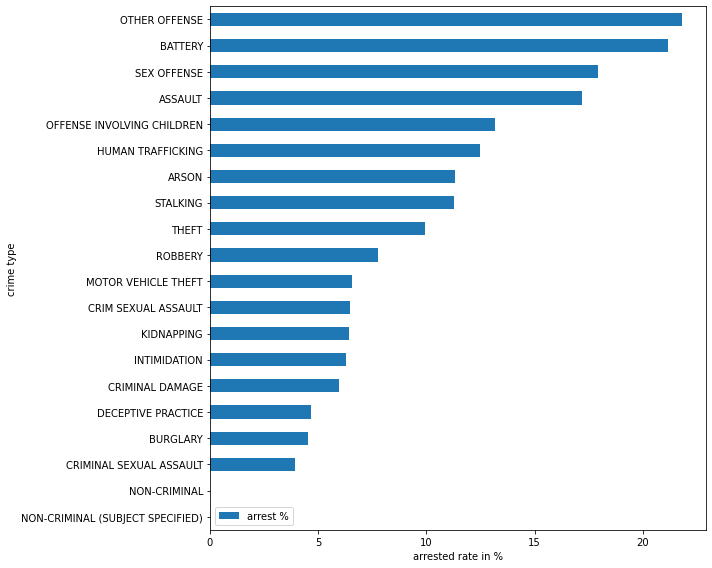

In [202]:
rate_per_crime_1=rate_per_crime.sort_values(by='arrest %', ascending=True).head(20).drop(['Arrest'], axis=1)
rate_per_crime_1.plot(x='Primary Type', y="arrest %", kind='barh', figsize=(10,8))
plt.xlabel('arrested rate in %')
plt.ylabel('crime type')
plt.tight_layout()
plt.show()

## analysis of crimes on day basis

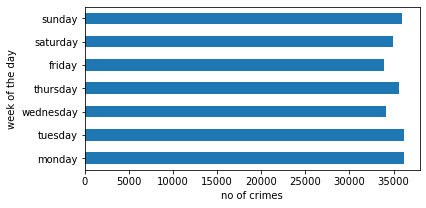

In [210]:
days=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
df2=df.groupby([df.index.dayofweek]).size()
df2.plot(kind='barh', figsize=(6,3))
plt.xlabel('no of crimes')
plt.ylabel('week of the day')
plt.yticks(np.arange(7),days)
plt.show()

## crimes as per month wise

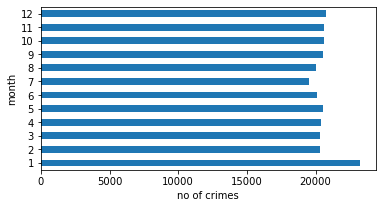

In [211]:
df3=df.groupby([df.index.month]).size()
df3.plot(kind='barh', figsize=(6,3))
plt.xlabel('no of crimes')
plt.ylabel('month')
plt.show()

## overall crimes throughout the period

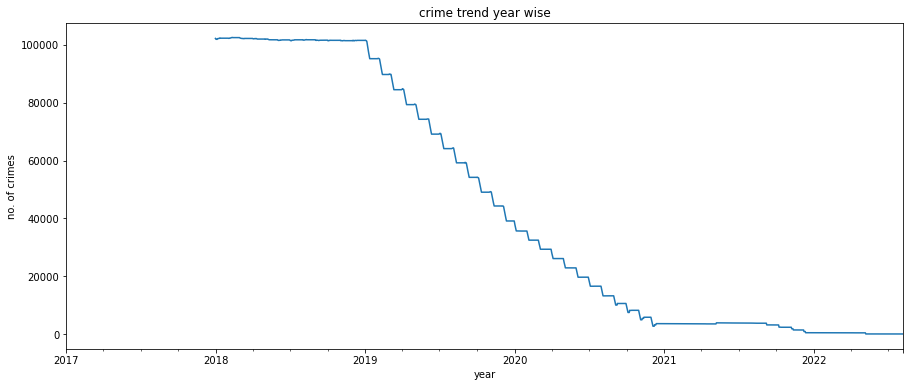

In [236]:
plt.figure(figsize=(15,6))
df.resample('d').size().rolling(365).sum().plot()
plt.title('crime trend year wise')
plt.ylabel('no. of crimes')
plt.xlabel('year')
plt.show()

### from above plot we can conclude that crimes are decresing drastically, it shows a good sign